In [76]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
#Population numbers in Georgia in thousands 
population_thou_2021 = pd.read_csv('/kaggle/input/geostat-data/data.csv')
population_thou_2021 = population_thou_2021.astype('int64')
population_thou_2021.head()

,Year,Women,Men,Total
0,1897,893,1020,1913
1,1926,1324,1353,2677
2,1939,1775,1765,3540
3,1959,2179,1865,4044
4,1960,2221,1908,4129


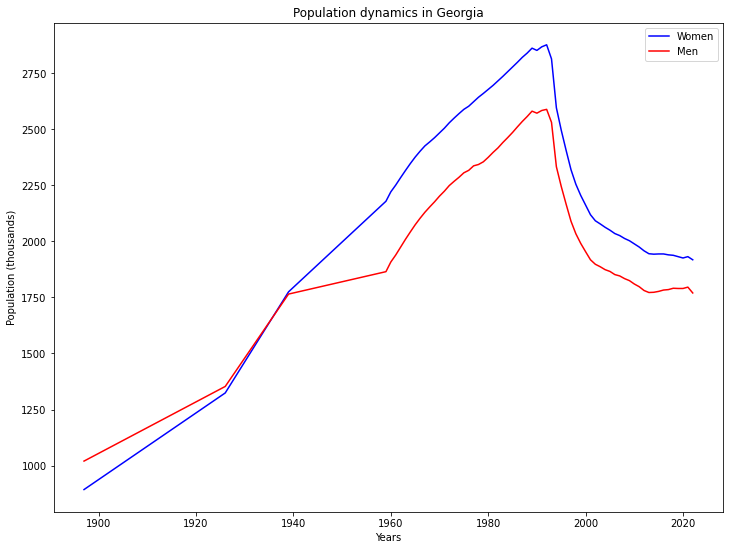

In [78]:
plt.figure(figsize=[12,9])
plt.plot( population_thou_2021['Year'], population_thou_2021['Women'],'b')
plt.plot( population_thou_2021['Year'], population_thou_2021['Men'],'r')
plt.title("Population dynamics in Georgia")
plt.xlabel('Years')
plt.ylabel('Population (thousands)')
plt.legend(['Women', 'Men'])
plt.show()

After the boom at the start of the 1990s, the population of Georgia has been experiencing a downward trend, 
The start of the decline in male population can be traced to the pre-war years. Apparently, it never quite recovered after World War II losses, counting over 400 000.

In [79]:
#Information on the number of deaths due to mental disorders in both men and women.
population_deaths = pd.read_csv('/kaggle/input/geostat-data/data_deaths.csv')
mental_disorder_deaths = population_deaths.loc[4].reset_index()

#cleaning up the data and shaping the data frame
mental_disorder_deaths.rename(columns={'index':'Year', 4: 'Number'}, inplace=True)
mental_disorder_deaths.drop(0, axis=0, inplace=True)
mental_disorder_deaths['Sex'] = [i[5:] for i in mental_disorder_deaths['Year']]
mental_disorder_deaths['Year'] = [i[0:5] for i in mental_disorder_deaths['Year']]
mental_disorder_deaths = mental_disorder_deaths.astype({'Sex': 'category', 'Year': 'int64','Number': 'int64'})
mental_disorder_deaths.head()

#overall variance for both sexes combined
mental_disorder_deaths['Number'].var()

372.3657004830918

In [80]:
#additional partitioning by gender
women_deaths = mental_disorder_deaths.sort_values(by='Sex', ascending=False).reset_index()
women_deaths = women_deaths.loc[0:22].sort_values(by='Year').reset_index()

men_deaths = mental_disorder_deaths.sort_values(by='Sex').reset_index()
men_deaths = men_deaths.loc[0:22].sort_values(by='Year').reset_index()

#means, variance and maximum values for each gender
men_deaths['Number'].var() #244.146
women_deaths['Number'].var() #474.347
men_deaths['Number'].mean() #36.652
women_deaths['Number'].mean() #27.565
women_deaths['Number'].max() #89
men_deaths['Number'].max() #69
men_deaths[men_deaths['Year'] == 2021]['Number'] #65

22    65
Name: Number, dtype: int64

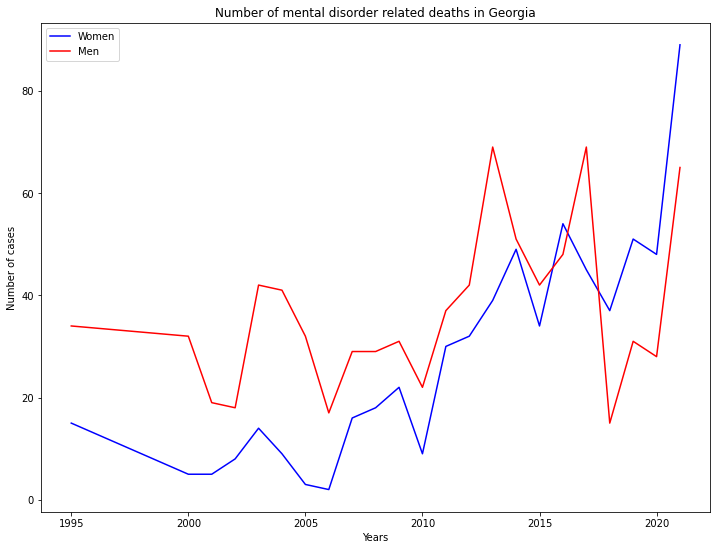

In [81]:
plt.figure(figsize=[12,9])
plt.plot(women_deaths['Year'], women_deaths['Number'],'b')
plt.plot(men_deaths['Year'], men_deaths['Number'],'r')
plt.title('Number of mental disorder related deaths in Georgia')
plt.xlabel('Years')
plt.ylabel('Number of cases')
plt.legend(['Women', 'Men'])
plt.show()

While the general trends follow each other quite closely, women have recently (circa 2016) overtaken men in terms of mental illness-related deaths, but men still retain a higher average of 36.652 with much lower variance of 244.146, as compared with women's 27.565 and 474.347 respectively. Much more concerning is the strength of the observed positive trend that culminates in the all-time maximum for women (89) and second-highest for men (65). 

In [82]:
#The number of mental disorder cases registered in Georgia between 2010 and 2014 for urban and rural areas
mental_disorders_registered = pd.read_csv('/kaggle/input/geostat-data/data_psy.csv')
mental_disorders_registered.head()

columns = mental_disorders_registered.columns.values[1:]

years = [i[0:4] for i in columns]
locations = [i[5:10] for i in columns]
genders = [i[11:] for i in columns]
stats = mental_disorders_registered.iloc[0].values[1:]
mental_disorders_regist = pd.DataFrame(data={'Sex': genders, 'Location': locations, 'Year': years, 'Cases': stats}, index=None)
mental_disorders_regist = mental_disorders_regist.astype({'Sex': 'category', 'Year': 'int64', 'Location': 'category'})
mental_disorders_regist.head()

#means and variance for registered mental disorder cases in men and women
mental_disorders_regist[mental_disorders_regist['Sex'] == 'Men']['Cases'].mean() #22600.1
mental_disorders_regist[mental_disorders_regist['Sex'] == 'Women']['Cases'].mean() #15171.5
mental_disorders_regist[mental_disorders_regist['Sex'] == 'Men']['Cases'].var() #15123171.9
mental_disorders_regist[mental_disorders_regist['Sex'] == 'Women']['Cases'].var() #3308540.9

3308540.9444444445

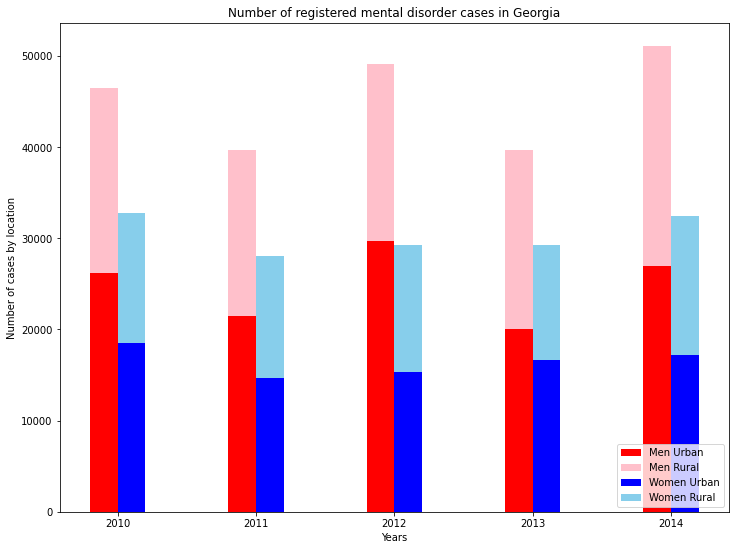

In [83]:
#splitting data by sex, urban/rural numbers and year
location_progression = mental_disorders_regist.groupby(['Sex', 'Location', 'Year'])['Cases'].sum().reset_index()

#location split for male cases
men_progression = location_progression.loc[0:9]
men_rural = men_progression.loc[0:4]
men_urban = men_progression.loc[5:10]

#location split for female cases
women_progression = location_progression.loc[10:19]
women_rural = women_progression[0:5]
women_urban = women_progression[5:10]

#stacked side-by-side bar charts for ease of comparison
plt.figure(figsize=[12,9])
plt.bar(men_urban['Year']-0.1, men_urban['Cases'], width=0.2, color='red')
plt.bar(men_rural['Year']-0.1, men_rural['Cases'], width=0.2, bottom= men_urban['Cases'], color='pink')
plt.bar(women_urban['Year']+0.1, women_urban['Cases'], width=0.2, color='blue')
plt.bar(women_rural['Year']+0.1, women_rural['Cases'], width=0.2, bottom= women_urban['Cases'], color='skyblue')
plt.title('Number of registered mental disorder cases in Georgia')
plt.xlabel('Years')
plt.ylabel('Number of cases by location')
plt.legend(['Men Urban', 'Men Rural', 'Women Urban', 'Women Rural'], loc=4)
plt.show()

The available data for 2010-2014 indicate a much higher incidence of mental disorders in men, especially in urban areas, with both the maximum values and the mean being above that of the female population. Female cases, on the other hand, show a much smaller variance and average, being less numerous in general. However, it is worth mentioning that healthcare services, including those for mental health are far less available in Georgian countryside, making the dominance of urban cases somewhat questionable.  

In [84]:
# New data on mental disorders for 1995-2021 by gender
new_psy_disorders = pd.read_csv('/kaggle/input/geostat-data/data_psy_dis.csv')
new_psy_disorders.head()

#split by gender
columns = new_psy_disorders.columns.values[1:]
years = [i[0:4] for i in columns]
genders = [i[5:] for i in columns]
stats = new_psy_disorders.iloc[0].values[1:]
new_psy_disord = pd.DataFrame(data={'Sex': genders, 'Year': years, 'Cases': stats}, index=None)
new_psy_disord = new_psy_disord.astype({'Sex': 'category', 'Year': 'int64', 'Cases': 'int64'})
new_psy_disord.head()


,Sex,Year,Cases
0,Women,1995,995
1,Men,1995,1477
2,Women,1999,767
3,Men,1999,1123
4,Women,2000,759


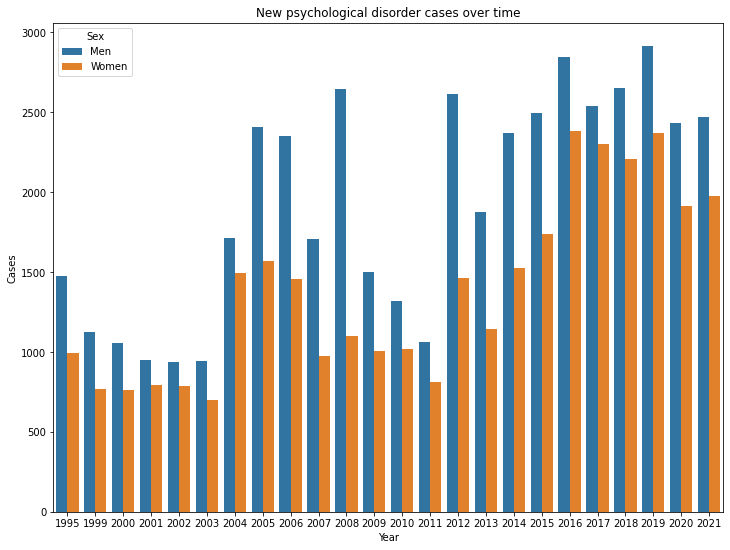

In [85]:
plt.figure(figsize=[12,9])
sns.barplot(data=new_psy_disord, x="Year", y="Cases", hue="Sex").set(title='New psychological disorder cases over time')
plt.show()

An expanded timeframe supports the preceding thesis in terms of overall numbers and variation.

In [86]:
#Data on suicides in Georgia by gender for years 2000 - 2021
population_suicides = pd.read_csv('/kaggle/input/geostat-data/data_suicides.csv')
population_suicides.head()

#data cleanup
columns = population_suicides.columns.values[1:]
years = [i[0:4] for i in columns]
genders = [i[5:].capitalize() for i in columns]
stats_teens = population_suicides.iloc[0].values[1:]
stats_adults = population_suicides.iloc[1].values[1:]
pop_suicides = pd.DataFrame(data={'Sex': genders, 'Year': years, 'Cases 15-19': stats_teens, 'Cases 20+': stats_adults}, index=None)
pop_suicides = pop_suicides.replace('-', 0)
pop_suicides = pop_suicides.astype({'Sex': 'category', 'Year': 'int64', 'Cases 15-19': 'int64', 'Cases 20+': 'int64'})
pop_suicides.head()

,Sex,Year,Cases 15-19,Cases 20+
0,Women,2000,0,31
1,Men,2000,1,105
2,Women,2005,1,17
3,Men,2005,2,66
4,Women,2006,1,11


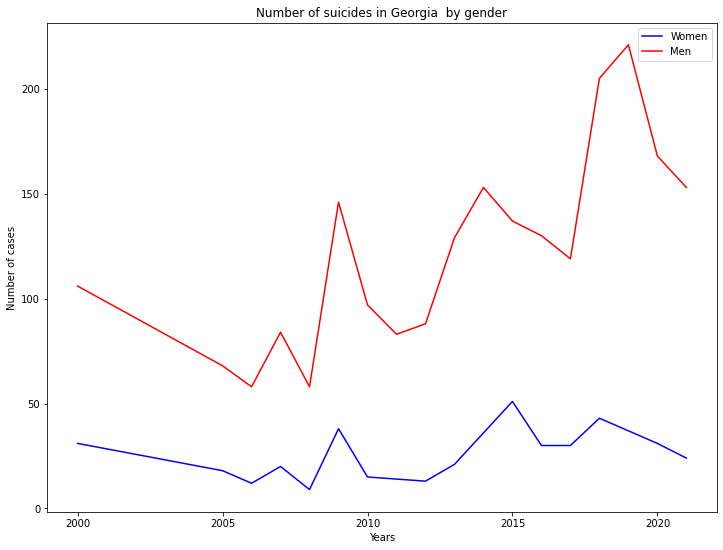

51

In [95]:
#gender split
women_suicides = pop_suicides.sort_values(by='Sex', ascending=False).reset_index()
women_suicides = women_suicides.loc[0:17].sort_values(by='Year').reset_index()

men_suicides = pop_suicides.sort_values(by='Sex').reset_index()
men_suicides = men_suicides.loc[0:17].sort_values(by='Year').reset_index()

#age aggregation
num_cases_fem = women_suicides['Cases 15-19'] + women_suicides['Cases 20+']
num_cases_male = men_suicides['Cases 15-19'] + men_suicides['Cases 20+']

#max cases and means by gender
num_cases_male.max() #221
num_cases_fem.max() #51
num_cases_male.mean() #122.38
num_cases_fem.mean() #26.28

In [ ]:
plt.figure(figsize=[12,9])
plt.plot(women_suicides['Year'], num_cases_fem,'b')
plt.plot(men_suicides['Year'], num_cases_male,'r')
plt.title('Number of suicides in Georgia  by gender')
plt.xlabel('Years')
plt.ylabel('Number of cases')
plt.legend(['Women', 'Men'])
plt.show()

The numbers of male suicides in Georgia is higher than that of its female population, the maximum being four times higher, and the average - about four and a half. And while the recent trend is negative in both cases, it may be misleading, as the number of suicides tends to peak after a decline. 

In [88]:
# Government-financed mental health by case number, age group and gender
dis_financed_cases = pd.read_csv('/kaggle/input/geostat-data/data_funded.csv')
mental_health_fin_cases = dis_financed_cases.loc[12].reset_index()

#data cleanup
mental_health_fin_cases['Sex'] = [i[9:] for i in mental_health_fin_cases['index']]
mental_health_fin_cases['Years'] = [i[0:5] for i in mental_health_fin_cases['index']]
mental_health_fin_cases['Age Groups'] = [i[4:11] for i in mental_health_fin_cases['index']]
mental_health_fin_cases['Financed MH Cases'] = mental_health_fin_cases[12][1:]
mental_health_fin_cases.drop(0, axis=0, inplace=True)
mental_health_fin_cases.drop(columns=['index', 12], axis=1, inplace=True)
mental_health_fin_cases['Sex'].replace('\d', '', regex=True, inplace=True)
mental_health_fin_cases['Age Groups'].replace('[A-Za-z]', '', regex=True, inplace=True)
mental_health_fin_cases = mental_health_fin_cases.astype({'Sex': 'category', 'Years': 'int64', 'Age Groups': 'category', 'Financed MH Cases': 'int64'})
mental_health_fin_cases['Sex'] = mental_health_fin_cases['Sex'].str.strip()
mental_health_fin_cases['Age Groups'] = mental_health_fin_cases['Age Groups'].str.strip()

#gender split
total_cases_female = mental_health_fin_cases[mental_health_fin_cases['Sex'] == 'Women'].sort_values(by='Age Groups')
total_cases_male = mental_health_fin_cases[mental_health_fin_cases['Sex'] == 'Men'].sort_values(by='Age Groups')


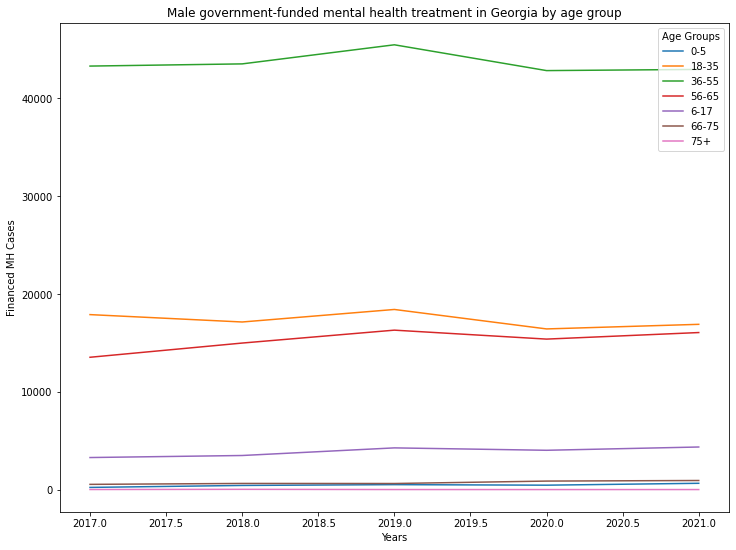

In [89]:
plt.figure(figsize=[12,9])
sns.lineplot(data=total_cases_male, x='Years', y='Financed MH Cases', hue='Age Groups').set(title='Male government-funded mental health treatment in Georgia by age group')
plt.show()

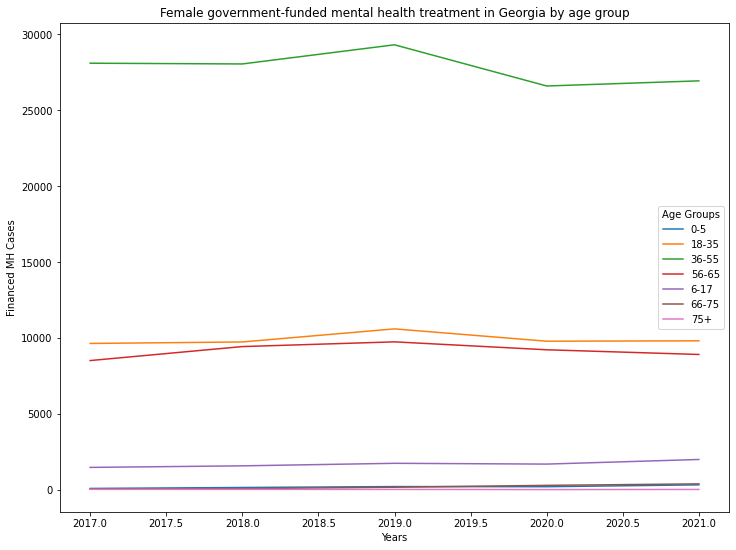

In [90]:
plt.figure(figsize=[12,9])
sns.lineplot(data=total_cases_female, x='Years', y='Financed MH Cases', hue='Age Groups').set(title='Female government-funded mental health treatment in Georgia by age group')
plt.show()

In [91]:
#Disability treatment funding by state for men and women
dis_financed_reg = pd.read_csv('/kaggle/input/geostat-data/data_funded_reg.csv')
dis_financed_reg.drop(2, axis=0, inplace=True) #Abkhasia had only null values
dis_financed_reg.head()
#could be useful for general disability financing analysis

,Region,2017 Women,2017 Men,2017 Total,2018 Women,2018 Men,2018 Total,2019 Women,2019 Men,2019 Total,2020 Women,2020 Men,2020 Total,2021 Women,2021 Men,2021 Total
0,GEORGIA,64638,113213,177851,65983,115861,181844,70237,124491,194728,68160,121254,189414,72257,127818,200075
1,Tbilisi,26768,48254,75022,27998,52595,80593,31825,60018,91843,31212,59777,90989,34064,63960,98024
3,Adjara AR,4937,7896,12833,4948,7732,12680,5531,9028,14559,5795,9694,15489,6495,11049,17544
4,Guria,3136,4362,7498,3115,4583,7698,2372,3897,6269,2053,3573,5626,2067,3501,5568
5,Imereti,9373,18537,27910,10055,18475,28530,9096,16983,26079,8346,15602,23948,8623,16746,25369


In [92]:
#split by gender and region
men_financed = pd.DataFrame(data=dis_financed_reg, columns=['Region', '2017 Men', '2018 Men', '2019 Men', '2020 Men', '2021 Men'])
men_financed = men_financed.astype({'2017 Men': 'int64', '2018 Men': 'int64', '2019 Men': 'int64', '2020 Men': 'int64', '2021 Men': 'int64'})

women_financed = pd.DataFrame(data=dis_financed_reg, columns=['Region', '2017 Women', '2018 Women', '2019 Women', '2020 Women', '2021 Women'])
women_financed = women_financed.astype({'2017 Women': 'int64', '2018 Women': 'int64', '2019 Women': 'int64', '2020 Women': 'int64', '2021 Women': 'int64'})

#total funding provided by gender, cleaned up
men_financed_tots = men_financed.loc[0].reset_index()
men_financed_tots.drop(0, axis=0, inplace=True)
men_financed_tots.replace('\D', '', regex=True, inplace=True)
men_financed_tots.rename(columns={'index': 'Years', 0: 'Numbers Georgia'}, inplace=True)
men_financed_tots = men_financed_tots.reset_index()
men_financed_tots.drop(columns='index', inplace=True)

women_financed_tots = women_financed.loc[0].reset_index()
women_financed_tots.drop(0, axis=0, inplace=True)
women_financed_tots.replace('\D', '', regex=True, inplace=True)
women_financed_tots.rename(columns={'index': 'Years', 0: 'Numbers Georgia'}, inplace=True)
women_financed_tots = women_financed_tots.reset_index()
women_financed_tots.drop(columns='index', inplace=True)

In [93]:
#mental health funding, split by gender
mental_health_fem = total_cases_female.groupby('Years')['Financed MH Cases'].sum().reset_index()
mental_health_male = total_cases_male.groupby('Years')['Financed MH Cases'].sum().reset_index()

mental_health_fem['Total Female Disability'] = women_financed_tots['Numbers Georgia']
mental_health_male['Total Male Disability'] = men_financed_tots['Numbers Georgia']

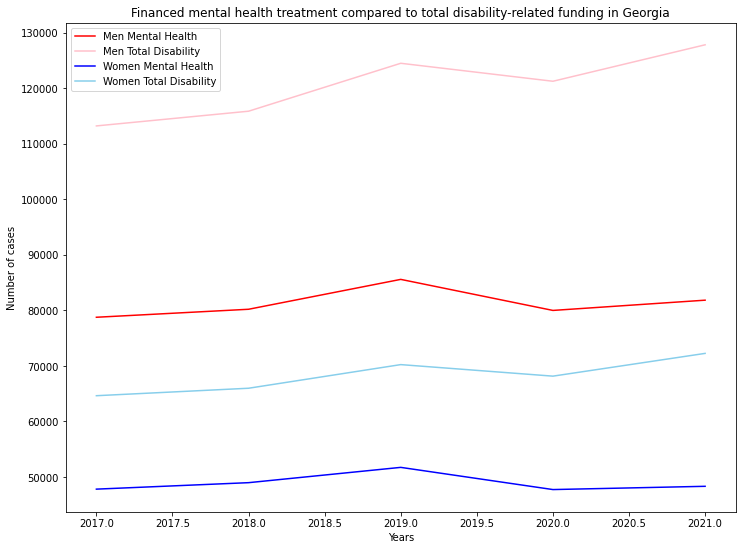

In [94]:
#summary plot for comparison
plt.figure(figsize=[12,9])

plt.plot(mental_health_male['Years'], mental_health_male['Financed MH Cases'], 'r')
plt.plot(mental_health_male['Years'], mental_health_male['Total Male Disability'], 'pink')
plt.plot(mental_health_fem['Years'], mental_health_fem['Financed MH Cases'], 'b')
plt.plot(mental_health_fem['Years'], mental_health_fem['Total Female Disability'], 'skyblue')
plt.xlabel('Years')
plt.ylabel('Number of cases')
plt.legend(['Men Mental Health', 'Men Total Disability', 'Women Mental Health', 'Women Total Disability'])
plt.title('Financed mental health treatment compared to total disability-related funding in Georgia')
plt.show()

Medical care and sevices for mental health are predominantly funded by Georgian government for the 36-55 year old age group, with 18-35 and 56-65 coming second and third. Financing in the sphere of mental health seems to be increasing at a much slower pace than treatment funding for disability in general. 
In addition, there exists a visible, nearly twofold disparity between sums allocated to male and female citizens. Combined with the previously observed positive trends for new mental disorders and related deaths, it is unlikely that the government's current policy is successful in either prevention or alleviation of mental health-related issues in Georgia.  

Further reading:

Curatio International Foundation (2014). Mental health care in Georgia: challenges and Possible solutions. At https://www.gip-global.org/files/mental-health-policy-brief-eng-web.pdf

Sharashidze, M., Naneishvili, G., Silagadze, T., Begiashvili, A., Sulaberidze, B., & Beria, Z. (2004). Georgia mental health country profile. International review of psychiatry (Abingdon, England), 16(1-2), 107–116. https://doi.org/10.1080/09540260310001635159